Week 4 · Day 2 — Hierarchical Clustering
Why this matters

Hierarchical clustering builds a tree of clusters (dendrogram). It’s useful when you don’t know the number of clusters in advance and want to see structure at multiple levels.

Theory Essentials

Agglomerative clustering: start with each point as its own cluster, merge closest pairs until one cluster remains.

Linkage criteria:

Single linkage: nearest points.

Complete linkage: farthest points.

Average linkage: mean distance.

Produces a dendrogram (tree).

No need to pre-select k, but you can “cut” the tree at a chosen level.

Computationally heavier than k-means.

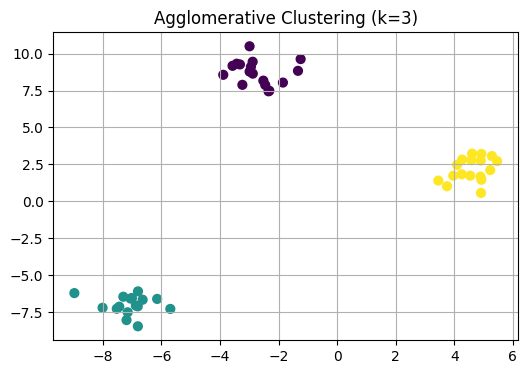

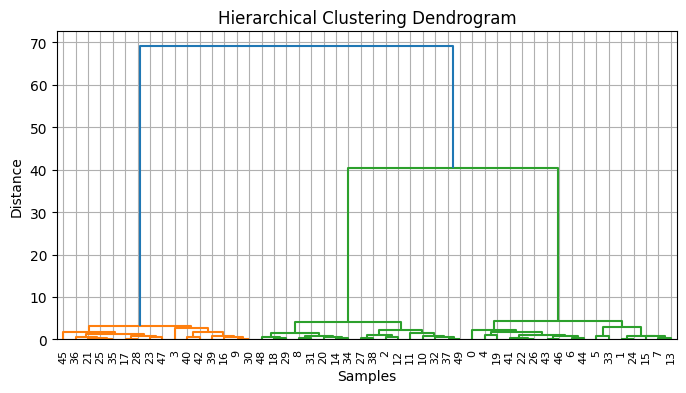

In [7]:
# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Generate dataset
X, y_true = make_blobs(n_samples=50, centers=3, cluster_std=0.8, random_state=42)

# Fit hierarchical clustering
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X)

# Plot result
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=40)
plt.title("Agglomerative Clustering (k=3)")
plt.show()

# Dendrogram
Z = linkage(X, method="ward")
plt.figure(figsize=(8,4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


Agglomerative clustering does not start with “three random blobs.”

It starts with each point as its own cluster (so 50 clusters here).

Then, step by step, it merges the two closest clusters.

It keeps merging until the number of clusters you want (k=3) is reached.

That’s why in the scatter plot you see 3 blobs — the result after merging down.

✅ Now, the dendrogram

The dendrogram is the history of those merges:

Bottom: every sample (each small tick = one point).

Vertical lines: show when clusters merged.

Height (y-axis) = the distance (or dissimilarity) at which two clusters were merged.

Low merge = clusters very similar (close points).

High merge = clusters far apart, only joined near the end.

In your dendrogram:

Lots of merges at very low height (points inside each blob getting grouped).

Then two big jumps at ~40 and ~70 distance → the three main blobs merging.

1) Core (10–15 min)
Task: Change linkage from "ward" to "single" and "complete". Compare plots.

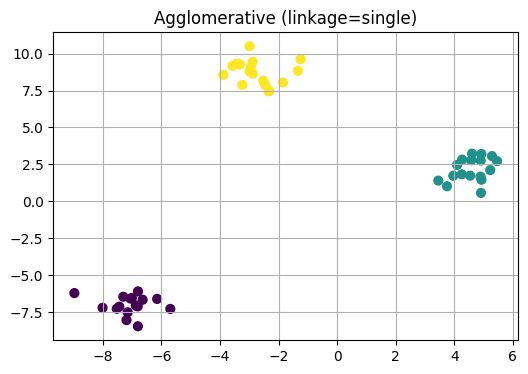

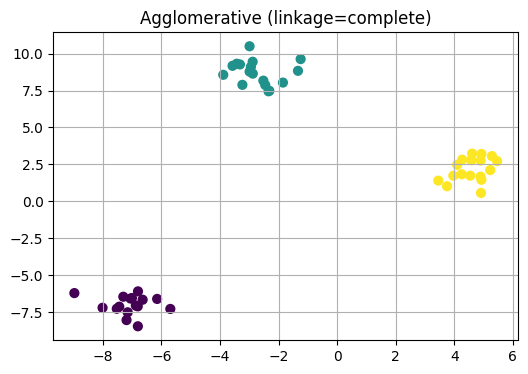

In [8]:
for method in ["single","complete"]:
    agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = agg.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=40)
    plt.title(f"Agglomerative (linkage={method})")
    plt.show()

🔹 The three linkage types

Ward (default)

Merges the two clusters that give the smallest increase in total variance.

Prefers compact, spherical clusters (like KMeans).

Often works well if blobs are balanced.

Single linkage

Distance between two clusters = distance between their closest points.

Produces “chain-like” clusters (can stretch long if points form a line).

Sensitive to noise/outliers.

Complete linkage

Distance between two clusters = distance between their farthest points.

Produces more compact, evenly sized clusters.

Less chaining, but can split elongated shapes.

2) Practice (10–15 min)
Task: Instead of fixing n_clusters, cut the dendrogram at different heights (e.g., 2–5 clusters).

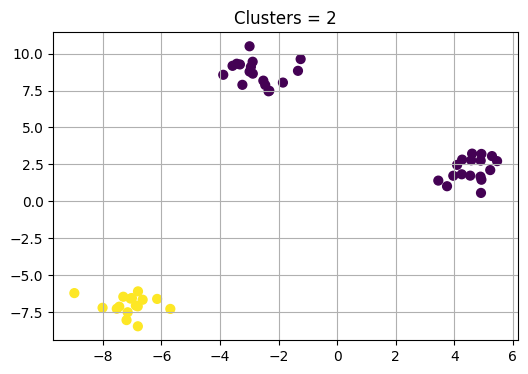

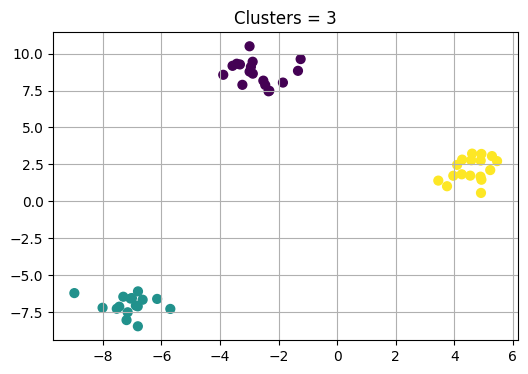

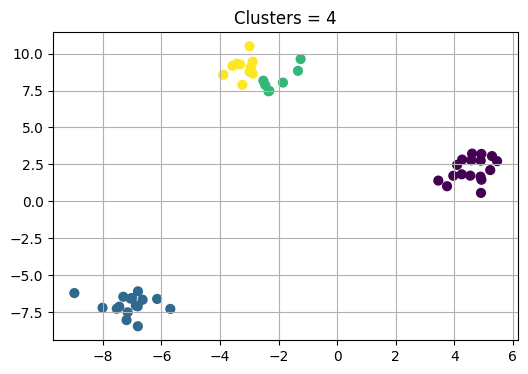

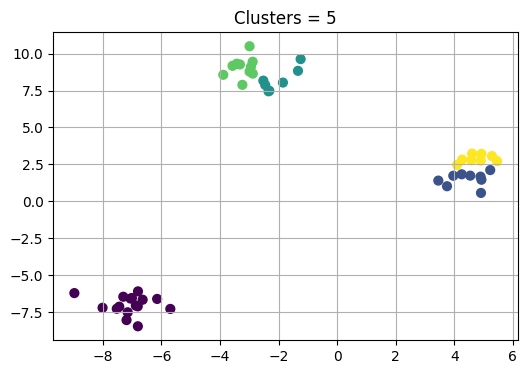

In [11]:
for k in range(2,6):
    agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = agg.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=40)
    plt.title(f"Clusters = {k}")
    plt.show()




3) Stretch (optional, 10–15 min)
Task: Apply hierarchical clustering on the Iris dataset with 3 clusters. Compare with true labels.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X)

print("Confusion matrix:")
print(confusion_matrix(iris.target, labels))

# print("Accuracy", accuracy_score(iris.target, labels))


Confusion matrix:
[[ 0 50  0]
 [49  0  1]
 [15  0 35]]
Accuracy 0.23333333333333334


Mini-Challenge (≤40 min)

Task: Build dendrogram visualizations for the Iris dataset with both "ward" and "complete" linkage.
Acceptance Criteria:

Show two dendrograms (ward vs complete).

Explain in 2–3 sentences how the shape of the dendrograms differs.

Mention which linkage seems more consistent with Iris’s natural grouping.

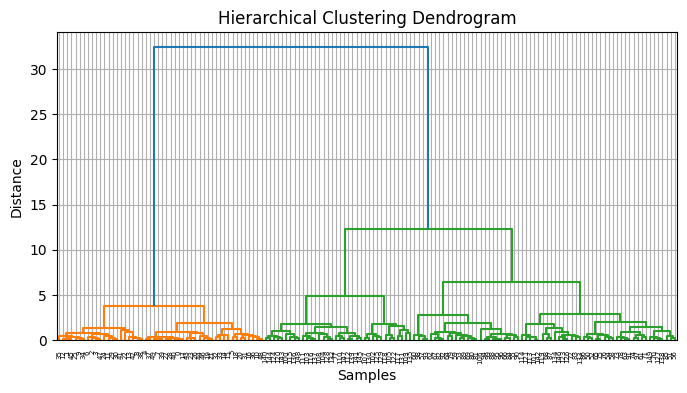

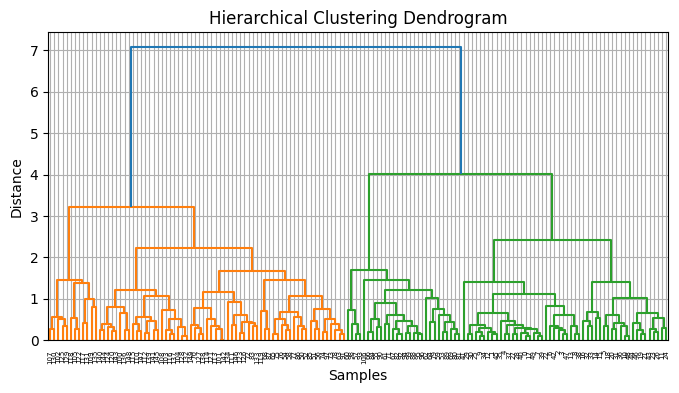

In [16]:
iris = load_iris()
X = iris.data

for methods in ["ward","complete"]:
    agg = AgglomerativeClustering(n_clusters=3, linkage=methods)
    labels = agg.fit_predict(X)


    
    # Dendrogram
    Z = linkage(X, method=methods)
    plt.figure(figsize=(8,4))
    dendrogram(Z)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


The Ward dendrogram shows most merges at very small distances, which makes many links hard to see — it groups samples tightly. The Complete dendrogram spreads merges out because it considers the farthest distances, so clusters look more separated. Overall, Ward seems more consistent with the Iris dataset, since its species have compact, similar features.

Notes / Key Takeaways

Hierarchical clustering creates a tree of merges.

Different linkage rules produce different shapes.

No need to pick k in advance; dendrogram can guide selection.

Good for small/medium datasets (expensive for very large ones).

Dendrograms give more insight than k-means’ “flat” clustering.

Reflection

Why might hierarchical clustering be better than k-means for some datasets?

What limitations make it less scalable than k-means?

Why might hierarchical clustering be better than k-means?

It doesn’t assume clusters are spherical or equally sized — it can capture more complex shapes.

It builds a full tree (dendrogram), so you don’t need to fix k in advance — you can choose later.

It can reveal relationships between clusters at multiple scales (nested structure).

What limitations make it less scalable than k-means?

Complexity: building the dendrogram requires computing pairwise distances → 
O(n2), very slow for large datasets.

Memory: storing the full distance matrix also grows quadratically with data size.

KMeans is much faster O(n) per iteration) and can handle huge datasets, while hierarchical clustering struggles once you go beyond a few thousand points.